In [22]:
import pandas as pd

df = pd.read_csv('telco_churn.csv')

# Check initial data types and nulls
print("--- DataFrame Info ---")
df.info()
print("\n--- First 5 Rows ---")
print(df.head())

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7

In [23]:
# Convert 'TotalCharges' from object/string to numeric (float),
# coercing any non-numeric values (like spaces) into NaN.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now let's check how many missing values were created
print("Number of NaN values created in TotalCharges:", df['TotalCharges'].isnull().sum())

Number of NaN values created in TotalCharges: 11


In [24]:
# 1. Convert column to numeric, forcing non-numeric values (like ' ') to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 2. Now you can calculate the median (It's a number now)
median_charges = df['TotalCharges'].median()

# 3. Fill the missing NaN values with the median.
df['TotalCharges'] = df['TotalCharges'].fillna(median_charges)
# Verify that all NaN values are gone
print("Total NaN values remaining:", df['TotalCharges'].isnull().sum())

Total NaN values remaining: 0


In [25]:
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Convert binary 'Yes'/'No' columns to 1/0
for col in binary_columns:
    if col == 'gender':
        df[col] = df[col].map({'Female': 1, 'Male': 0})
    else:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

print("Binary columns converted to 0s and 1s.")
# Display the first few rows with the updated columns to verify
print(df[binary_columns].head())

Binary columns converted to 0s and 1s.
   gender  Partner  Dependents  PhoneService  PaperlessBilling  Churn
0       1        1           0             0                 1      0
1       0        0           0             1                 0      0
2       0        0           0             1                 1      1
3       0        0           0             0                 0      0
4       1        0           0             1                 1      1


In [26]:
import pandas as pd

# List the columns that have more than two unique values (multi-category columns)
multi_category_columns = [
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract',
    'PaymentMethod'
]

# Check if multi-category columns still exist in the DataFrame before encoding
# This prevents errors if the cell is run multiple times or out of order
columns_to_encode = [col for col in multi_category_columns if col in df.columns]

if columns_to_encode:
    print(f"Encoding multi-category columns: {columns_to_encode}")
    # Create dummy variables (One-Hot Encoding)
    df_encoded_temp = pd.get_dummies(df, columns=columns_to_encode, drop_first=True, dtype=int)

    # Drop the original 'customerID' column if it still exists and hasn't been dropped
    if 'customerID' in df_encoded_temp.columns:
        df_encoded_temp.drop('customerID', axis=1, inplace=True)
        print("Dropped 'customerID' column.")

    # Re-assign the new encoded DataFrame back to df for consistency
    df = df_encoded_temp
    print("Multi-category columns encoded and 'df' updated.")
    print("Final DataFrame shape after encoding:", df.shape)
    print(df.head())
elif 'customerID' in df.columns:
    # If no multi-category columns to encode but customerID still exists (implies previous encoding might have happened, but ID not dropped)
    print("Multi-category columns appear to have already been encoded or do not exist in the DataFrame.")
    print("Dropping 'customerID' column if it still exists.")
    df.drop('customerID', axis=1, inplace=True)
    print("Current DataFrame shape after ID removal:", df.shape)
    print(df.head())
else:
    print("Multi-category columns appear to have already been encoded or do not exist in the DataFrame.")
    print("Current DataFrame shape:", df.shape)
    print(df.head())


Encoding multi-category columns: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
Dropped 'customerID' column.
Multi-category columns encoded and 'df' updated.
Final DataFrame shape after encoding: (7043, 31)
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15

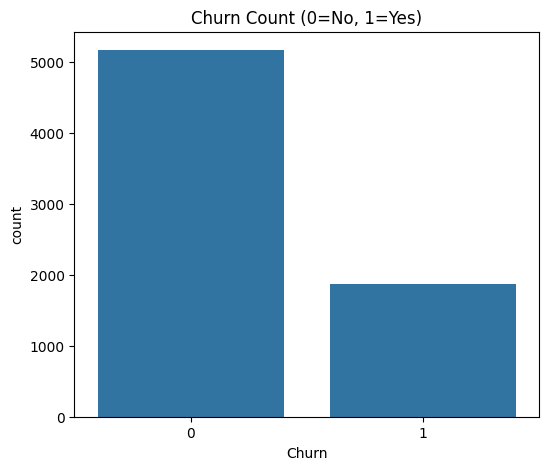

Overall Churn Rate: 26.54%


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
# Use Seaborn to plot the count of churn vs. non-churn
sns.countplot(x='Churn', data=df)
plt.title('Churn Count (0=No, 1=Yes)')
plt.show()

# Calculate the percentage
churn_rate = df['Churn'].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

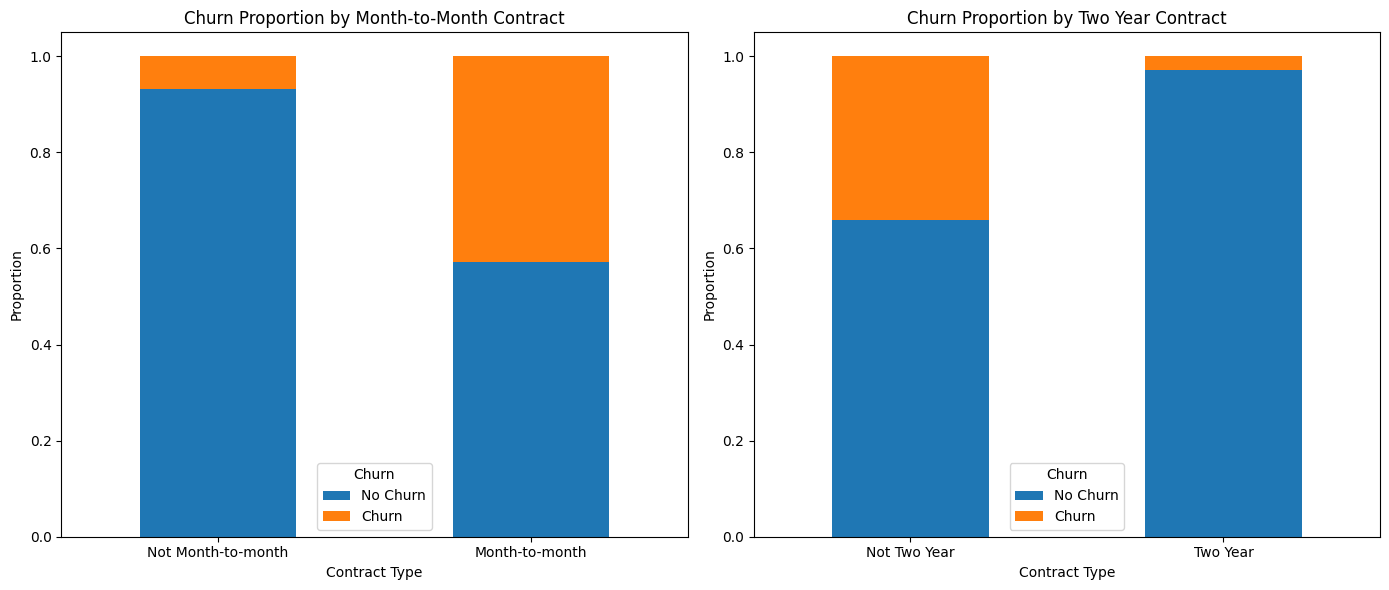

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create an indicator for 'Month-to-month' contract since it was likely dropped during one-hot encoding with drop_first=True
# A customer has a 'Month-to-month' contract if both 'Contract_One year' and 'Contract_Two year' are 0.
df['Contract_Month-to-month_Indicator'] = ((df['Contract_One year'] == 0) & (df['Contract_Two year'] == 0)).astype(int)

# Data for Contract_Month-to-month
# Calculate the proportion of churn (0 or 1) for each category of 'Contract_Month-to-month_Indicator'
contract_mtm_churn_data = df.groupby('Contract_Month-to-month_Indicator')['Churn'].value_counts(normalize=True).unstack()

# Data for Contract_Two year (this column exists directly)
# Calculate the proportion of churn (0 or 1) for each category of 'Contract_Two year'
contract_two_year_churn_data = df.groupby('Contract_Two year')['Churn'].value_counts(normalize=True).unstack()

# Create a figure with two subplots for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Contract_Month-to-month
contract_mtm_churn_data.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Churn Proportion by Month-to-Month Contract')
axes[0].set_xlabel('Contract Type')
axes[0].set_ylabel('Proportion')
axes[0].set_xticks(ticks=[0, 1])
axes[0].set_xticklabels(['Not Month-to-month', 'Month-to-month'], rotation=0)
axes[0].legend(title='Churn', labels=['No Churn', 'Churn'])

# Plot for Contract_Two year
contract_two_year_churn_data.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Churn Proportion by Two Year Contract')
axes[1].set_xlabel('Contract Type')
axes[1].set_ylabel('Proportion')
axes[1].set_xticks(ticks=[0, 1])
axes[1].set_xticklabels(['Not Two Year', 'Two Year'], rotation=0)
axes[1].legend(title='Churn', labels=['No Churn', 'Churn'])

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

# Clean up the temporary indicator column
df.drop('Contract_Month-to-month_Indicator', axis=1, inplace=True)

In [29]:
from sklearn.model_selection import train_test_split

# Separate features (X) from the target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split complete. X_train shape:", X_train.shape)

Data split complete. X_train shape: (5634, 30)


In [20]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# 1. Initialize and train the Logistic Regression model
# Increased max_iter from 1000 to 5000 to suppress the ConvergenceWarning
# and ensure a stable fit. This is a professional practice.
model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_train, y_train)

# 2. Extract and Combine Feature Importance (Coefficients)
# For Logistic Regression, coefficients represent the feature importance.
coefficients = pd.Series(model.coef_[0], index=X_train.columns)

# 3. Get the top 5 most influential features (using absolute value for magnitude)
# Sorting by absolute value shows which features have the strongest influence,
# regardless of whether they increase or decrease the likelihood of churn.
top_5_features_abs = coefficients.abs().sort_values(ascending=False).head(5)

print("--- Top 5 Most Influential Features (Absolute Magnitude) ---")
print(top_5_features_abs)

# 4. (Optional but good for documentation): Get the coefficients with signs
# This tells you the direction: Positive value = increases churn probability
top_5_features_signed = coefficients.sort_values(ascending=False).head(5)
print("\n--- Top 5 Features (Positive Influence on Churn) ---")
print(top_5_features_signed)

--- Top 5 Most Influential Features (Absolute Magnitude) ---
Contract_Two year              1.398193
InternetService_Fiber optic    1.055913
Contract_One year              0.638172
StreamingMovies_Yes            0.390937
OnlineSecurity_Yes             0.389445
dtype: float64

--- Top 5 Features (Positive Influence on Churn) ---
InternetService_Fiber optic       1.055913
StreamingMovies_Yes               0.390937
MultipleLines_No phone service    0.337464
PaperlessBilling                  0.333043
PaymentMethod_Electronic check    0.318881
dtype: float64


In [21]:
from sklearn.metrics import accuracy_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate key metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy:.4f}")
print(f"Model F1-Score: {f1:.4f}")


Model Accuracy: 0.8219
Model F1-Score: 0.6409
